In [328]:
import jax
import jax.numpy as jnp

from jax import random
from jax import grad,value_and_grad
from jax.test_util import check_grads

# TODO try the penalty rather than norm algo

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
def plot_surface(x_path, y_path, f):

    # Functions from your code

    # Create a meshgrid for plotting the surface
    x_vals = np.linspace(0, 4, 100)
    y_vals = np.linspace(-4, 1, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    # Create a figure
    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(111, projection='3d')


    # Example optimization points (replace with real points from your optimization process)
    # These points could be stored in your 'ps' array from the earlier code

    # Unpack x and y from the optimization path
    z_path = f(x_path, y_path)


    y_slice = -x_vals  # y = -x
    z_slice = f(x_vals, y_slice)  # Evaluate f at the slice

    # Plot the slice of f(x, y) where y = -x
    ax.plot(x_vals, y_slice, z_slice, 'r--', label=r'$z = f(x, y)|_{y = -x}$', linewidth=2, zorder=3)

    # Plot the path with a dashed line and points
    ax.scatter(x_path, y_path, z_path, color='r', s=50, label=r'$(x_K, y_K, f(x_K, y_K))$', zorder=2)

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7, zorder=1)


    # Add labels and title
    ax.set_title("Point spread by V-PBGD", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.view_init(elev=120, azim=190)  # Change these values to control the view


    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

In [330]:
import numpy as np

def g(x,y):
    return (x+y)**2+x*(np.sin(x+y))**2

def dg(x,y):
    return 2*np.array([x+y+0.5*(np.sin(x+y))**2+x*np.sin(x+y)*np.cos(x+y),
                     x+y+x*np.sin(x+y)*np.cos(x+y)])

def f(x,y):
    return np.cos(4*y+2)/(1+np.exp(2-4*x))+0.5*np.log((4*x-2)**2+1)

def df(x,y):
    return np.array([4*np.exp(2-4*x)*np.cos(4*y+2)/(1+np.exp(2-4*x)**2)+(16*x-8)/((4*x-2)**2+1),
                     -4*np.sin(4*y+2)/(1+np.exp(2-4*x))])

def box(x,xlim):
    if x>max(xlim):
        return max(xlim)
    elif x<min(xlim):
        return min(xlim)
    else:
        return x

# v-pbgd algorithm
def solveF(x0,y0,alpha,gam,epsilon=0.01):
    ls=[float(np.abs(y0+x0))]  
    dF = df(x0,y0)+gam*dg(x0,y0)
    x_ = box(x0-alpha*dF[0],xlim)
    y_ = y0-alpha*dF[1]
    pg=1/alpha*np.array([x0-x_,y0-y_])
    pgs=[float(np.linalg.norm(pg))]
    k=0
    while np.linalg.norm(pg) > epsilon:
        x=x_
        y=y_
        dF = df(x,y)+gam*dg(x,y)
        x_ = box(x-alpha*dF[0],xlim)
        y_ = y-alpha*dF[1]
        pg=1/alpha*np.array([x-x_,y-y_])
        
        pgs.append(float(np.linalg.norm(pg)))
        ls.append(float(np.abs(y+x)))
        k+=1  
    return (x,y,k), (pgs, ls)





In [331]:
rng = np.random.default_rng(seed=42)

xlim=[0,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(0,3.5)
    y=np.random.uniform(-5,8.5)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f)

(x0,y0) is (0.3690922216064377, -0.3117725667204878)
(x0,y0) is (0.8483970684918756, 6.8365490612872755)
(x0,y0) is (3.067684924462574, 0.11197104014550785)
(x0,y0) is (1.0964314473726895, -3.97420589571181)
(x0,y0) is (3.0727376599973146, -2.863314523955342)
(x0,y0) is (2.396259379189452, 6.205067030384027)
(x0,y0) is (0.3585078328367983, 4.034825204864095)
(x0,y0) is (3.2751649701652576, 4.453600956827007)
(x0,y0) is (1.306440463314809, 1.3684969946050005)
(x0,y0) is (2.9195064243367854, -4.719974052428735)


KeyboardInterrupt: 

# Counter example

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
def plot_surface(x_path, y_path, f, y_star):

    # Functions from your code

    # Create a meshgrid for plotting the surface
    x_vals = np.linspace(-3, 3, 100)
    y_vals = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    # Create a figure
    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(111, projection='3d')


    # Example optimization points (replace with real points from your optimization process)
    # These points could be stored in your 'ps' array from the earlier code

    # Unpack x and y from the optimization path
    z_path = f(x_path, y_path)


    y_slice = np.clip(y_star(x_vals), np.min(y_vals), np.max(y_vals))
    z_slice = f(x_vals, y_slice)  # Evaluate f at the slice

    # Plot the slice of f(x, y) where y = -x
    ax.plot(x_vals, y_slice, z_slice, 'r--', label=r'$z = f(x, y)|_{y = -x}$', linewidth=2, zorder=3)

    # Plot the path with a dashed line and points
    ax.scatter(x_path, y_path, z_path, color='r', s=50, label=r'$(x_K, y_K, f(x_K, y_K))$', zorder=2)

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7, zorder=1)


    # Add labels and title
    ax.set_title("Point spread by V-PBGD", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.view_init(elev=60, azim=270)  # Change these values to control the view


    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

(x0,y0) is (-0.9582623666400991, -0.10739074461596054)
(x0,y0) is (-0.1583322036670083, -1.9810739245168687)
(x0,y0) is (-0.6489120822868282, 3.1720823993563947)
(x0,y0) is (2.6146909684847692, -3.0889482612202146)
(x0,y0) is (1.1763620364780554, -0.4597804249445048)
(x0,y0) is (-3.4902010411584534, 3.969720861874933)
(x0,y0) is (2.1936687057317528, 1.8089248216913383)
(x0,y0) is (0.7091840619973198, -1.1167533597300636)
(x0,y0) is (3.2101617219783884, -2.7831713602506607)
(x0,y0) is (0.1704912049616416, 2.641546844183317)


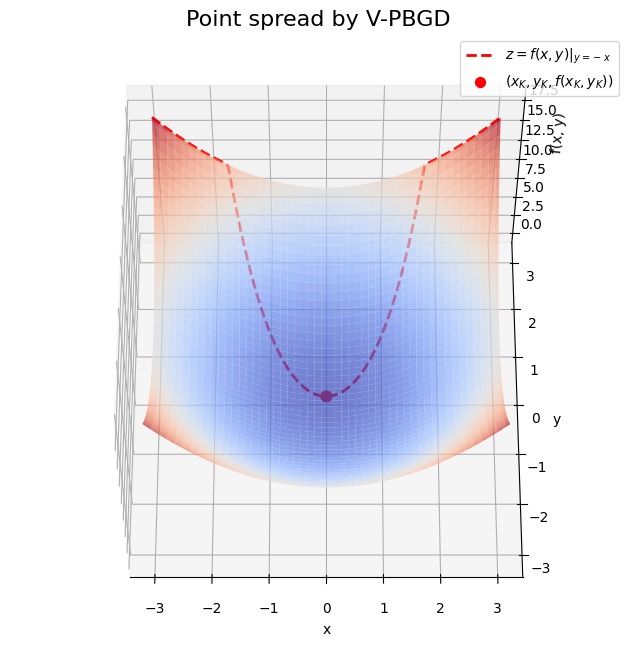

In [114]:
def h(z):
    return z**2

def g(x,y):
    return (h(x) - y)^2

def dg(x,y):
    return  np.array([8*(x**3) - 4*x*y, -2*(x**2) + 2*y])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])

def y_star(x):
    return x**2

rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, y_star)
          

(x0,y0) is (0.5696548064171356, -1.5457584513357672)
(x0,y0) is (0.7817701617305426, -0.14637527466994094)
(x0,y0) is (3.7785538549168214, 3.014800254882264)
(x0,y0) is (2.892061383722087, 0.39526281671964636)
(x0,y0) is (-1.1173648638323126, -2.8944002670537774)
(x0,y0) is (3.8690095004205602, -1.4111152985156812)
(x0,y0) is (2.6424008019011085, 1.1555063993333903)
(x0,y0) is (-0.16674076660146664, 1.2064672971666495)
(x0,y0) is (-3.7213344089239424, 2.4290440644500926)
(x0,y0) is (-3.2816413301409346, -3.4361316045348413)


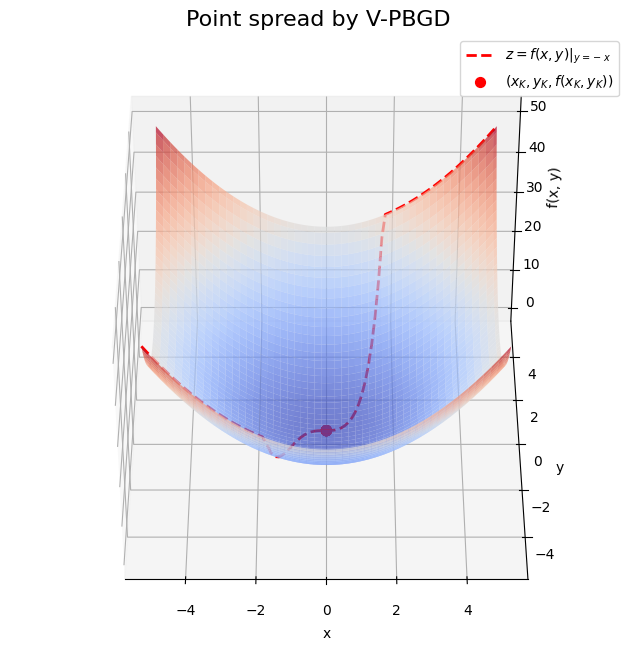

In [97]:
def h(z):
    return z**3

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([12*(x**5) - 6*(x**2)*y, -2*(x**3) + 2*y])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[-1,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          

(x0,y0) is (3.109319244915161, -2.117532216597046)
(x0,y0) is (-1.7246552493713523, -2.9851680094165998)
(x0,y0) is (2.720754030158832, 2.5518911090235408)
(x0,y0) is (-3.9610632571581768, 1.9640146050198242)
(x0,y0) is (0.05708660641825247, 0.17836427903841567)
(x0,y0) is (2.8549307003274276, -0.23593971703399852)
(x0,y0) is (-0.9424018351857306, 0.9406984983391702)
(x0,y0) is (-0.7450386569152245, 3.0620580308832954)
(x0,y0) is (-2.2599388537825194, -3.227274558009314)
(x0,y0) is (3.4266400689440673, 0.3303857328602371)
(x0,y0) is (1.119327916765549, 0.04834003131926767)
(x0,y0) is (3.043833670299138, -0.8818852883212909)
(x0,y0) is (-1.6279635405128676, 0.090424799842447)
(x0,y0) is (-0.928169254249533, -3.7538055526479743)
(x0,y0) is (-2.5329443193262637, -2.312019080535163)
(x0,y0) is (1.9253868901057398, 3.0063414706642844)
(x0,y0) is (3.8424506460675776, 0.2839229699710959)
(x0,y0) is (-1.0251264798661133, 2.398044255588725)
(x0,y0) is (3.2888757051827247, -1.4264132680572175)
(

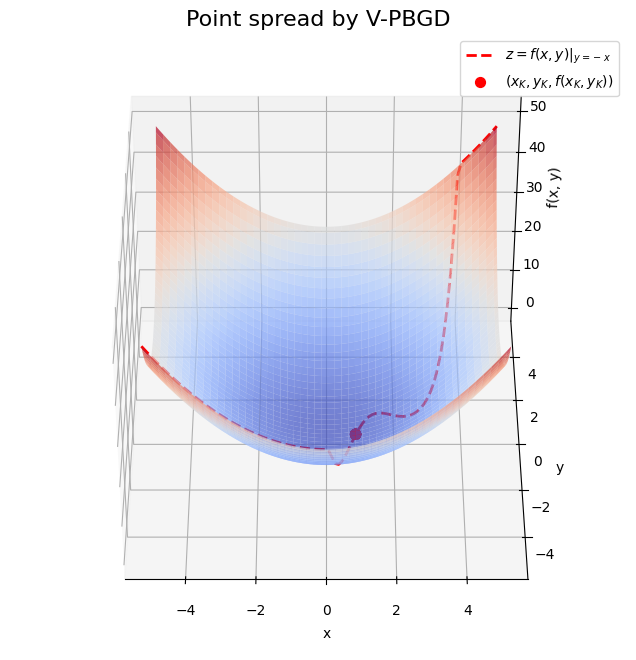

In [98]:
def h(z):
    return (z-1) * (z-2) * (z-3)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(3*x**2 - 12*x + 11) *(x**3 - 6*x**2 + 11*x - y - 6),2*y - 2*(x-3)*(x-2)*(x-1)])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=50 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          


(x0,y0) is (-1.375407012490511, -1.3718181650657018)
(x0,y0) is (3.5671401014604136, -3.2633641640687348)
(x0,y0) is (-1.017710555751461, -3.881435045457337)
(x0,y0) is (1.1932430680519115, -3.487212370875257)
(x0,y0) is (3.915944780796103, -1.5780590763445783)
(x0,y0) is (-0.4425009332534353, -3.2602319621284312)
(x0,y0) is (3.163069296826456, 2.3063466536216772)
(x0,y0) is (3.231353261876489, 2.5656026551270017)
(x0,y0) is (-0.8183808521569276, 3.447742383931371)
(x0,y0) is (-3.8260849580871197, -3.112823583322042)


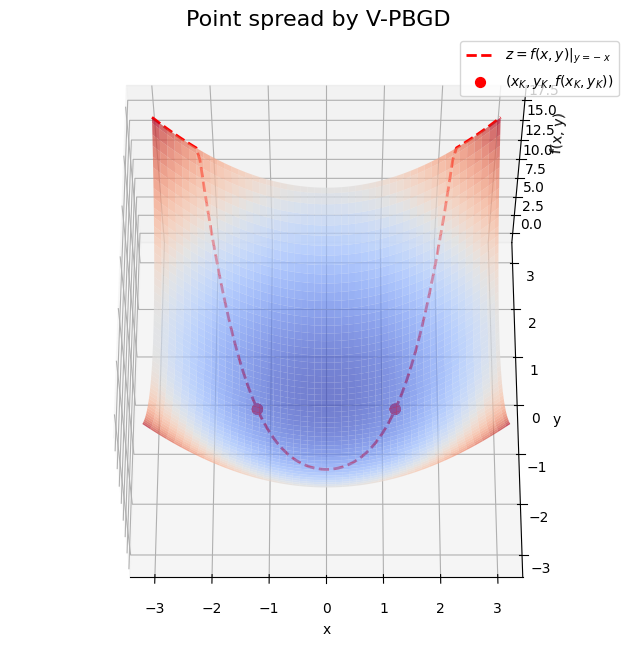

In [73]:
def h(z):
    return (z**2)- 2

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([4*x*(x**2 - 2 - y), -2*(x**2 - 2 - y)])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[-3.,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[100] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          
#setting this to 0,0 is a counter example ie it converges to a local kkt point


(x0,y0) is (-3.8168846998947803, 0.9943330974296254)
(x0,y0) is (3.3281823971755813, -2.656951924164993)
(x0,y0) is (0.9218008129538742, 1.2538397601199645)
(x0,y0) is (-3.641314185984448, 1.3444959368987668)
(x0,y0) is (-0.4329996933872353, -0.936097195014642)
(x0,y0) is (0.11180364623916184, -2.2990427721600275)
(x0,y0) is (-1.1485614352892446, 0.24105898263715453)
(x0,y0) is (3.04389800360933, 2.8726079056677385)
(x0,y0) is (-0.1799467328185358, -3.106957725000256)
(x0,y0) is (0.287490633785926, 2.340131342881053)
(x0,y0) is (0.11361938737042188, 1.991820009462173)
(x0,y0) is (-2.9629652621636016, 2.2312577048193285)
(x0,y0) is (-2.3110416182610134, -1.1766222401779425)
(x0,y0) is (0.9776217055369516, 2.1040922218629223)
(x0,y0) is (0.988546628844647, 0.9362520301613735)
(x0,y0) is (3.7577722426467286, -3.5531074481356733)
(x0,y0) is (-2.972444721750038, 1.2420964599136832)
(x0,y0) is (2.9525628638800203, 3.7158706415837672)
(x0,y0) is (-3.306458085659525, 1.4890995573832528)
(x0,y0

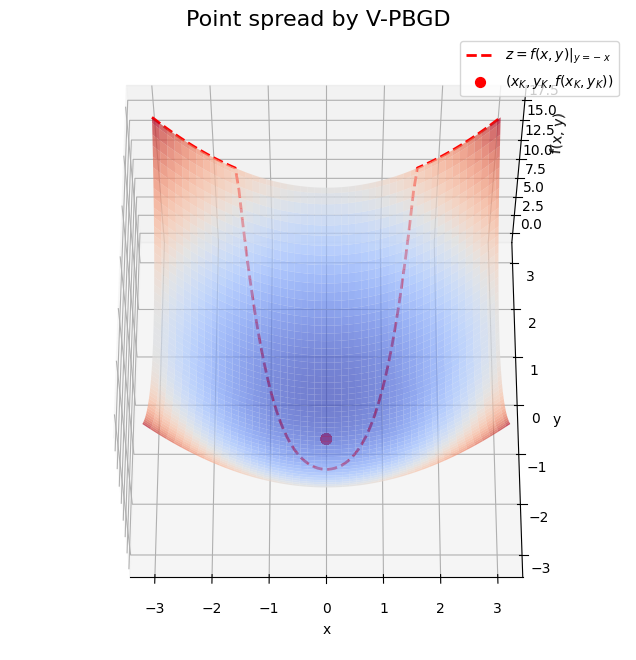

In [103]:
def h(z):
    return 2*(z**2)- 2

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([16*x**3 - 8*x*y - 16*x, 2*y - 4*x**2 + 4])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[0.,0.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.001 # step size
N=50 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          
#setting this to 0,0 is a counter example ie it converges to a local kkt point


(x0,y0) is (3.9980368355577456, -0.964296783918015)


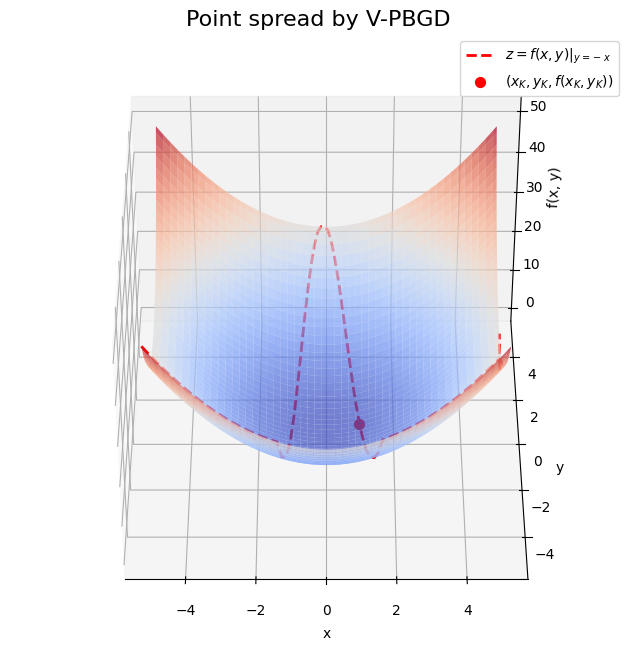

In [109]:
def h(z):
    return (z-1) * (z+1) * (z-5)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(3*x**2 - 10*x - 1) *(x**3- 5*x**2 - x - y + 5), 2*y - 2*(x-5)*(x-1)*(x+1)])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=1 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          


(x0,y0) is (-2.775138226146333, 2.7590035038293657)
(x0,y0) is (-2.7313584060543796, 2.814135927940124)
(x0,y0) is (-1.3260982824602285, -2.990057441233181)
(x0,y0) is (2.155889748322876, -3.14670712403002)
(x0,y0) is (-3.4304043427286848, 0.08176292665706342)
(x0,y0) is (-0.24663370723771294, -1.198401383145229)
(x0,y0) is (-2.499199499837891, 0.32312715056999597)
(x0,y0) is (-2.632786882405818, -0.6347899964270489)
(x0,y0) is (2.2034228185010374, -0.35663876112617476)
(x0,y0) is (-3.7674332822034122, 0.4837527052369719)


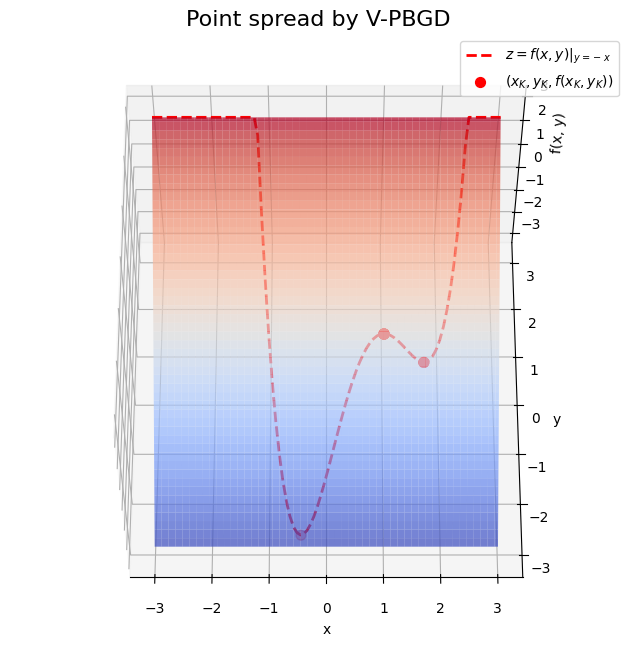

In [108]:
def h(z):
    return (z-1) * (z+1) * (z-1) * (z-2)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(4*x**3 - 9*x**2 +2*x + 3)*(x**4 - 3*x**3 +x**2 + 3*x - y - 2), 2*y - 2*(x - 2)*((x-1)**2)*(x+1)])

def f(x,y):
    return y

def df(x,y):
    return np.array([0,1])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[100] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          


(x0,y0) is (1.1248324843351218, 2.342603578096363)
(x0,y0) is (-1.999201217625406, 2.4959221964293414)
(x0,y0) is (0.8825682576766614, 1.8799524125639948)
(x0,y0) is (-3.557396703865594, 2.517260941892209)
(x0,y0) is (-3.244660910148797, -3.512625502905263)
(x0,y0) is (-2.374712602390325, -3.44206468066308)
(x0,y0) is (-1.0719180911566584, -3.2935151954894257)
(x0,y0) is (-3.587466078607405, -0.09478313898478774)
(x0,y0) is (-1.450202010070126, -0.3581178709717152)
(x0,y0) is (0.9819634337961674, -0.1472858381892692)


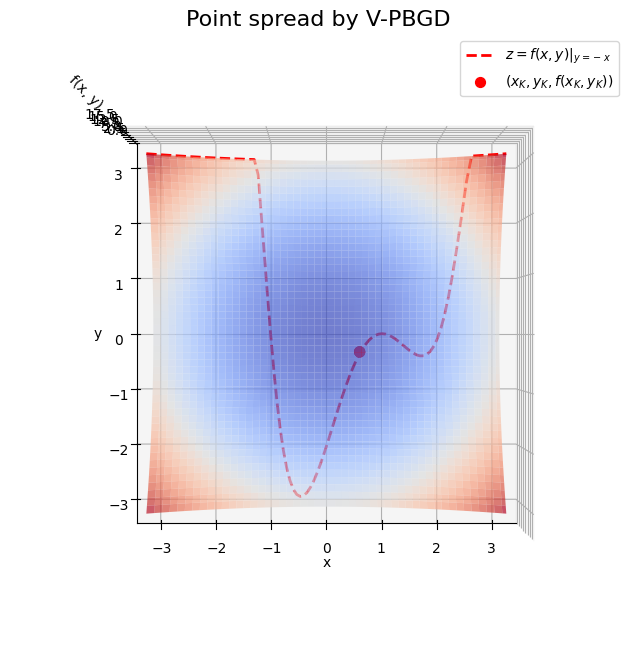

In [30]:
def h(z):
    return (z-1) * (z+1) * (z-1) * (z-2)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(4*x**3 - 9*x**2+2*x+3)*(x**4-3*x**3+x**2+3*x-y-2),2*y-2*(x-2)*((x-1)**2)*(x+1)])

def f(x,y):
    return (x**2) + (y**2)

def df(x,y):
    return np.array([2*x,2*y])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          

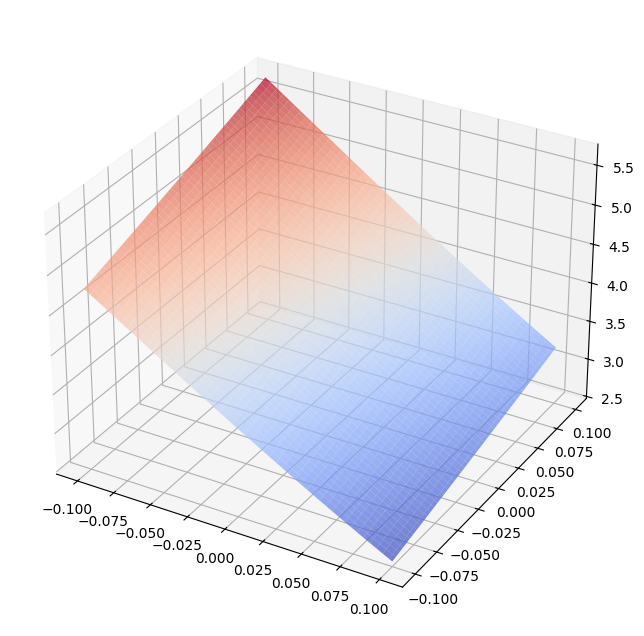

In [59]:
def composed(x,y):
    return  (((x-1) * (x+1) * (x-1) * (x-2)) - y)**2

x_vals = np.linspace(-0.1, 0.1, 100)
y_vals = np.linspace(-0.1, 0.1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = composed(X, Y)

# Create a figure
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')


    # Plot the surface
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7, zorder=1)
#ax.view_init(elev=90, azim=270)  # Change these values to control the view


(x0,y0) is (-1.103303871547582, 0.3406149218502712)
(x0,y0) is (0.7427863794887344, 3.1939403195014524)
(x0,y0) is (-0.9699809000807962, 0.38661613619879276)
(x0,y0) is (1.3204140786791667, 0.5063658510222266)
(x0,y0) is (3.722969189567457, 0.17652865909046156)
(x0,y0) is (-2.7755457144997884, -0.44923309349985363)
(x0,y0) is (2.68912993083337, 0.08607223865530766)
(x0,y0) is (0.30303329230886966, -0.5035993452191798)
(x0,y0) is (-3.593767717097455, 0.9414219037819693)
(x0,y0) is (-2.4996008249172768, -1.135258453035493)
(x0,y0) is (-0.3593707955700767, -2.2499360886897417)
(x0,y0) is (-3.979166889626729, 3.479758733692136)
(x0,y0) is (-1.806995361492663, 2.8113030693794405)
(x0,y0) is (-1.4048043590924104, 3.2177868961442293)
(x0,y0) is (1.9031481763329925, -3.4532815802631234)
(x0,y0) is (3.5429567393500507, -3.1555025867878337)
(x0,y0) is (-2.143730868838303, 3.265204555050154)
(x0,y0) is (2.997822454317684, -3.889922547249771)
(x0,y0) is (0.9584334700933086, 0.17599086781893636)
(x

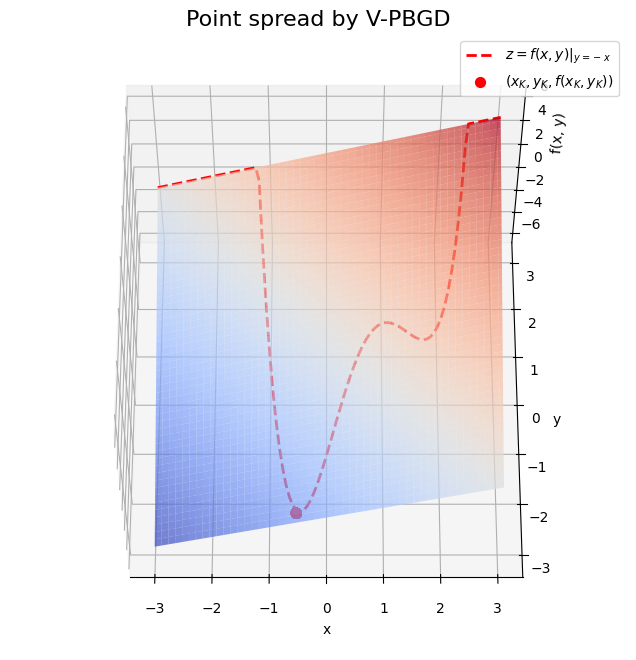

In [98]:
def h(z):
    return (z-1) * (z+1) * (z-1) * (z-2)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(4*x**3 - 9*x**2+2*x+3)*(x**4-3*x**3+x**2+3*x-y-2),2*y-2*(x-2)*((x-1)**2)*(x+1)])

def f(x,y):
    return x + y

def df(x,y):
    return np.array([1,1])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[10] # penalty constant
alpha0=0.01 # step size
N=50 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          

# Value gap

In [191]:

# v-pbgd algorithm
def solveF2(x0,y0,alpha,gam,epsilon=0.001):
    ls=[float(np.abs(y0+x0))]  
    dF = df(x0,y0)+gam*dg(x0,y0)
    print('df',dF)
    x_ = box(x0-alpha*dF[0],xlim)
    y_ = y0-alpha*dF[1]
    pg=1/alpha*np.array([x0-x_,y0-y_])
    pgs=[float(np.linalg.norm(pg))]
    k=0
    while np.linalg.norm(pg) > epsilon:
        x=x_
        y=y_
        y_prime = y_
        for i in range(500):
            y_prime = y_prime - 10*alpha * dg(x,y_prime)[1]

        dF = df(x,y)+gam*(dg(x,y) - dg(x,y_prime))
        x_ = box(x-alpha*dF[0],xlim)
        y_ = y-alpha*dF[1]
        pg=1/alpha*np.array([x-x_,y-y_])
        
        pgs.append(float(np.linalg.norm(pg)))
        ls.append(float(np.abs(y+x)))
        k+=1  
    return (x,y,k), (pgs, ls)




(x0,y0) is (-3.2167791116915474, -1.5530608888418254)
df [-1903658.18792072    -8286.32427314]
(x0,y0) is (-0.08040625314893646, 2.6714850579563727)
df [-545.18411393  197.18549337]
(x0,y0) is (-2.4557337414354574, 0.37890015337352523)
df [-355888.74361031   -3082.2741979 ]
(x0,y0) is (0.9181064690116312, 1.4323082794585176)
df [-19.98665782  58.84902502]
(x0,y0) is (-0.8397113851514204, 2.115853587856793)
df [1081.39395831  147.25621053]
(x0,y0) is (0.7474633211303763, 1.2574103625343316)
df [-63.53822328  56.87992635]
(x0,y0) is (1.352676189206563, 1.9241987547190815)
df [72.8861078 85.5449279]
(x0,y0) is (-3.0492862883644962, 1.5929993749652658)
df [-1345863.44190003    -6721.83836296]
(x0,y0) is (0.30055580207465216, -1.2606530469695647)
df [20.7825424  -6.17453611]
(x0,y0) is (1.9533218159257961, -0.32922783709792824)
df [19.40528774 -7.15765912]


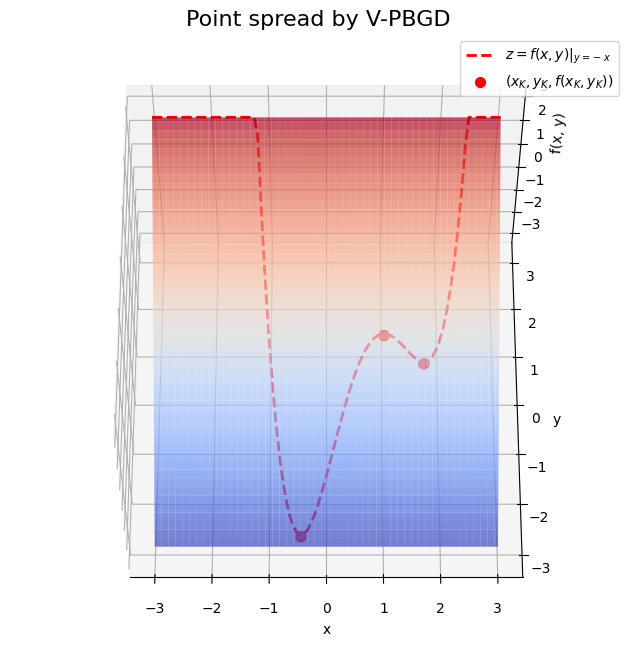

In [194]:
def h(z):
    return (z-1) * (z+1) * (z-1) * (z-2)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(4*x**3 - 9*x**2 +2*x + 3)*(x**4 - 3*x**3 +x**2 + 3*x - y - 2), 2*y - 2*(x - 2)*((x-1)**2)*(x+1)])

def f(x,y):
    return y

def df(x,y):
    return np.array([0,1])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[20] # penalty constant
alpha0=0.01 # step size
N=10 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF2(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          

Ghadimi and Wang (total gradient)

(x0,y0) is (3.5854295382417734, -3.157279075046442)
diff [58.54295382]
x,y 3.0 48.594604
diff [17.99999938]
x,y 2.8200000062192276 16.000488
diff [13.38573457]
x,y 2.6861426604813126 10.376249
diff [10.47999855]
x,y 2.5813426749392367 7.191252
diff [8.4970344]
x,y 2.496372330946002 5.2067924
diff [7.0670929]
x,y 2.4257014019097087 3.8864965
diff [5.99336611]
x,y 2.3657677408259534 2.964711
diff [5.16163875]
x,y 2.3141513533257774 2.2968593
diff [4.5012504]
x,y 2.2691388493320583 1.7985394
diff [3.96623154]
x,y 2.2294765339410447 1.417675
diff [3.52544963]
x,y 2.1942220376289 1.1207218
diff [3.15712201]
x,y 2.162650817554007 0.8852645
diff [2.84557638]
x,y 2.1341950537143135 0.6958346
diff [2.57926011]
x,y 2.108402452583493 0.5415396
diff [2.34949781]
x,y 2.084907474518573 0.41445544
diff [2.14964836]
x,y 2.0634109909353278 0.30878234
diff [1.97454527]
x,y 2.043665538265553 0.22015625
diff [1.82012585]
x,y 2.0254642797239035 0.1452462
diff [1.68314736]
x,y 2.008632806132858 0.081498414


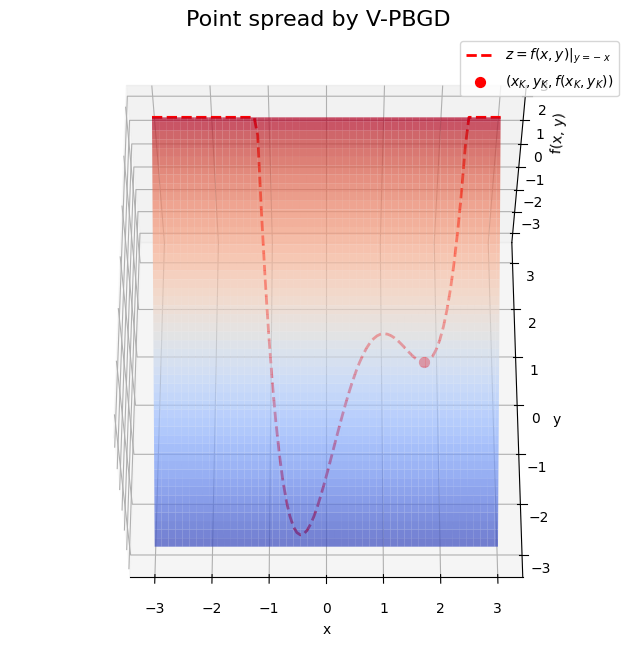

In [452]:
import numpy as np
import scipy.optimize as opt

# Modified BA Algorithm
# Adaptive and includes momentum for bilevel optimization

def solve_modified_BA(x0, y0, alpha, beta, epsilon=0.001, max_inner_iters=1000, lambda_reg=0.01):
    """
    Solves the modified bilevel optimization problem.
    
    Args:
    x0, y0: Initial guesses for x and y.
    alpha, beta: Step sizes for x and y updates.
    epsilon: Stopping criterion for gradient norms.
    max_inner_iters: Maximum number of inner loop iterations.
    lambda_reg: Regularization parameter for x update.
    
    Returns:
    (x, y, k): The optimized values of x, y, and the number of outer iterations.
    (pgs, ls): The projected gradient norms and loss values during optimization.
    """
    ls = [float(np.abs(y0 + x0))]  # Objective function tracking
    pgs = []
    k = 0

    # Outer loop initialization
    x = x0
    y = y0
    y_prime = y0

    while True:
        # Inner loop to update y
        y = y_prime
        for i in range(max_inner_iters):
            grad_y = dg(x, y_prime)[1]
            y_prime = y_prime - beta * grad_y
            # Stop if gradient norm is small enough
            if np.linalg.norm(grad_y) < epsilon:
                break

        # Update outer-level variable using gradient of f and penalty term
        # grad_f = df(x, y_prime)
        # grad_g = dg(x, y_prime)
        # hessian_yy_inv = np.linalg.pinv(hessian_yy(x, y_prime))  # Use pseudo-inverse to compute inverse Hessian
        # partial = hessian_xy(x, y_prime)
        
        # M = np.matmul(hessian_xy(x, y_prime), hessian_yy_inv)
        # grad_modified = grad_f - np.matmul(M, grad_g)

        # # Update x using adaptive learning rate and regularization
        # res = opt.minimize(
        #     lambda u: np.dot(grad_modified[0], u) + (lambda_reg / 2.0) * np.linalg.norm(u - x) ** 2,
        #     np.array([0]),
        #     bounds=[(-3, 3)],  # Assuming feasible region for x is [-3, 3]
        # )
        # print('res',res)
        # x_new = res.x

        #Update outer-level variable using gradient of f and penalty term
        grad_f = df(x, y_prime)
        grad_g = dg(x, y_prime)
        hessian_yy_inv = 1/ jax.jacfwd(jax.grad(g, argnums=(1)), argnums=(1))(x,y_prime) # Use pseudo-inverse to compute inverse Hessian
        hessian_xy = jax.jacfwd(jax.grad(g, argnums=(0)), argnums=(1))(x,y_prime)
        
        M = np.dot(hessian_xy, hessian_yy_inv)
        grad_modified = grad_f[0] - np.dot(M, grad_f[1])

        # Update x using adaptive learning rate and regularization
        res = opt.minimize(
            lambda u: np.dot(grad_modified, u) + 1/alpha * np.linalg.norm(u - x) ** 2,
            np.array([0]),
            bounds=[(-3, 3)],  # Assuming feasible region for x is [-3, 3]
        )
        x_new = res.x




        # Compute projected gradient and stop if small enough
        pg = (1 / alpha) * (x - x_new)
        g_norm = np.linalg.norm(grad_modified)
        print('diff',pg)
        if pg < epsilon:
            break

        # Update x and y for the next iteration
        x = box(x_new[0],xlim)
        y = y_prime

        print('x,y',x,y)

        # Track progress
        k += 1
        pgs.append(float(np.linalg.norm(pg)))
        #ls.append(float(np.abs(y + x)))

    return (x, y, k), (pgs, ls)

# Define functions for bilevel problem
def h(z):
    return (z - 1) * (z + 1) * (z - 1) * (z - 2)

def g(x, y):
    return (h(x) - y) ** 2

def dg(x, y):
    return jnp.array([
        2 * (4 * x ** 3 - 9 * x ** 2 + 2 * x + 3) * (x ** 4 - 3 * x ** 3 + x ** 2 + 3 * x - y - 2),
        2 * y - 2 * (x - 2) * ((x - 1) ** 2) * (x + 1),
    ])

def f(x, y):
    return y

def df(x, y):
    return np.array([0, 1])

def hessian_yy(x, y):
    # Placeholder: Compute the second derivative of g with respect to y (Hessian w.r.t. y)
    #hessian autograd
    return jax.hessian(g, argnums=(1))(x,y)

def hessian_xy(x, y):
    # Placeholder: Compute the cross-derivative of g w.r.t. x and y
    return  jax.jacfwd(jax.grad(g, argnums=(0)), argnums=(1))(x,y)

# Parameters
rng = np.random.default_rng(seed=42)
xlim = [-3, 3]  # This is set C
epsilon = 1e-3  # Stopping accuracy
alpha0 = 0.01  # Step size for x
beta0 = 0.01  # Step size for y
N = 1  # Number of runs

# # Running the modified BA algorithm
ps = np.zeros((N, 2))
for n in range(N):
    x = np.random.uniform(-4, 4)
    y = np.random.uniform(-4, 4)
    print('(x0,y0) is', (x, y))
    
    (x_opt, y_opt, k), _ = solve_modified_BA(x, y, alpha0, beta0, epsilon)
    ps[n, 0] = x_opt
    ps[n, 1] = y_opt

# Plotting the results (assuming a `plot_surface` function exists)
plot_surface(ps[:, 0], ps[:, 1], f, h)


In [423]:
def h(z):
    return (z - 1) * (z + 1) * (z - 1) * (z - 2)

def g(x, y):
    return (h(x) - y) ** 2

print(jax.jacfwd(dg, argnums=(1))(1.,1.)  
jax.jacfwd(dg, argnums=(0))(1.,1.)

Array(-0., dtype=float32)

In [392]:
hessian_xy(1.,1.)

Array(0., dtype=float32, weak_type=True)

(x0,y0) is (-2.5006049276286255, -2.1652297128565916)
df [-410442.35316075   -3396.03188196]


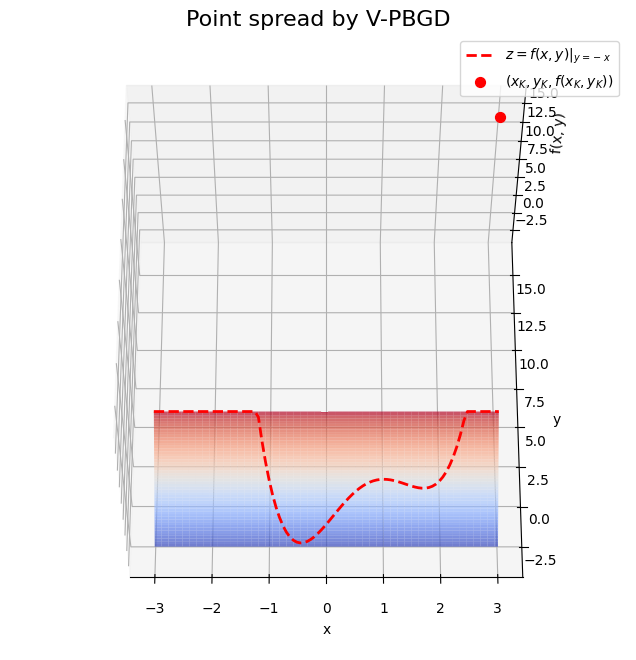

In [335]:
def h(z):
    return (z-1) * (z+1) * (z-1) * (z-2)

def g(x,y):
    return (h(x) - y)**2

def dg(x,y):
    return  np.array([2*(4*x**3 - 9*x**2 +2*x + 3)*(x**4 - 3*x**3 +x**2 + 3*x - y - 2), 2*y - 2*(x - 2)*((x-1)**2)*(x+1)])

def f(x,y):
    return y

def df(x,y):
    return np.array([0,1])



rng = np.random.default_rng(seed=42)

xlim=[-3,3.] # this is set C
epsilon=1e-5 # stopping accuracy
gams=[20] # penalty constant
alpha0=0.01 # step size
N=1 # number of runs

ps=np.zeros((N,2))
for n in range(N):
    x=np.random.uniform(-4,4)
    y=np.random.uniform(-4,4)
    print('(x0,y0) is',(x,y))
    K=0
    for gam in gams:
        alpha=alpha0/gam
        (x,y,k), _ = solveF3(x,y,alpha,gam,epsilon)
        K+=k  
    ps[n,0]=x
    ps[n,1]=y

plot_surface(ps[:, 0], ps[:, 1], f, h)
          